<a href="https://colab.research.google.com/github/MatheusBarros23/colabTest/blob/main/AtividadeMPRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade

In [1]:
!pip install kaggle

Faça upload do arquivo kaggle.json gerado em your profile > Account > Create New Token


Descomentar caso necessário!


In [7]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matheuspereirabarros","key":"2b9ca36808c697a5b866112e52af99bb"}'}

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [92]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import warnings
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KernelDensity
from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interp1d
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_rel
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm


## Classificação

### Dataset

In [10]:
!kaggle datasets download -d eisgandar/wrongful-convictions-in-the-us --force
!unzip -qo wrongful-convictions-in-the-us.zip

  0% 0.00/4.41k [00:00<?, ?B/s]
100% 4.41k/4.41k [00:00<00:00, 9.09MB/s]


In [11]:
df = pd.read_csv('Wrongful Convictions in the United States.csv')

In [12]:
df.head(10)

,Unnamed: 0,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
0,0,1805,Dominic Daley and James Halligan,murder,Massachusetts,death,yes,1
1,1,1843,John Gordon,murder,Rhode Island,death,yes,1
2,2,1855,Chief Leschi,murder,Washington,death,no,0
3,3,1863,Chipita Rodriguez,murder,Texas,death,yes,1
4,4,1872,William Jackson Marion,murder,Nebraska,death,yes,1
5,5,1886,"Oscar Neebe, August Spies, and Albert Parsons",haymarket affair,Illinois,15 years,yes,1
6,6,1887,Charles Hudspeth,murder,Arkansas,death,yes,1
7,7,1894,George Washington Davis,sabotage of Locomotive 213,Nebraska,NaN,yes,1
8,8,1896,Jack Davis,murder,Idaho,death,yes,1
9,9,1900,Caleb Powers,murder,Kentucky,NaN,yes,1


### EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  178 non-null    int64 
 1   Date of the Crime           178 non-null    int64 
 2   Defendants                  178 non-null    object
 3   Type of the Crime           178 non-null    object
 4   Location of the Crime       178 non-null    object
 5   Punishment for a crime      169 non-null    object
 6   Legally Exonerated          178 non-null    object
 7   Legally Exonerated Encoded  178 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 11.2+ KB


In [14]:
df.shape

(178, 8)

<Axes: >

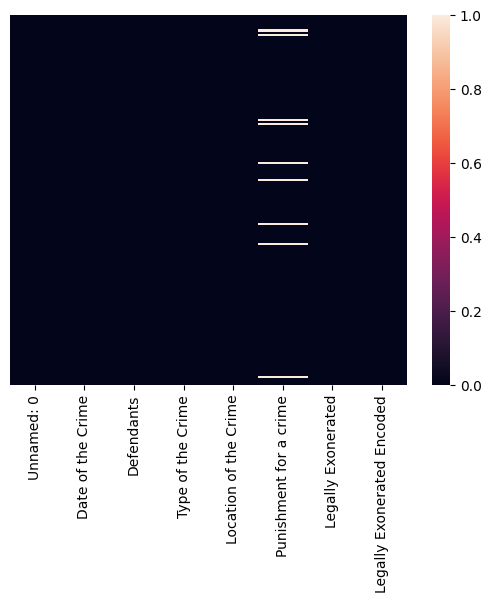

In [15]:
sns.heatmap(df.isnull(), yticklabels=False)

In [16]:
df=df.dropna().reset_index(drop=True)

In [17]:
df.shape

(169, 8)

<Axes: >

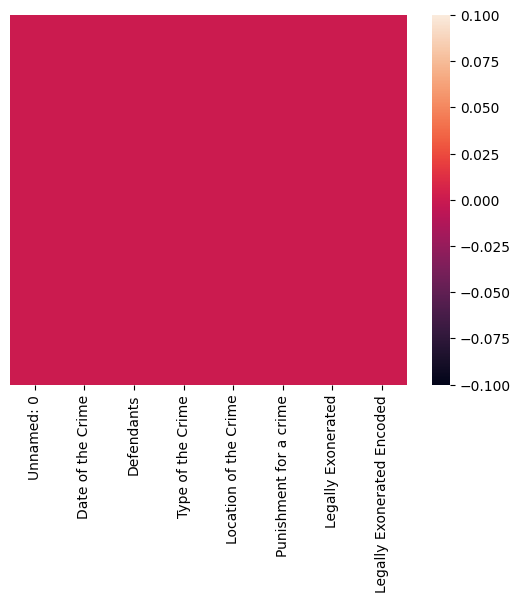

In [18]:
sns.heatmap(df.isnull(), yticklabels=False)

Acurácia: 0.7254901960784313
Matriz de Confusão:
[[ 1  8]
 [ 6 36]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.14      0.11      0.12         9
           1       0.82      0.86      0.84        42

    accuracy                           0.73        51
   macro avg       0.48      0.48      0.48        51
weighted avg       0.70      0.73      0.71        51



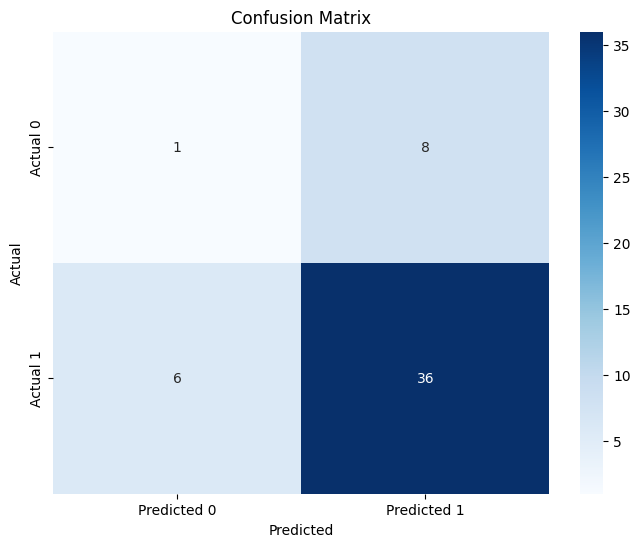

In [19]:
# Selecionando features e rótulos
X = df[['Date of the Crime']]
y = df['Legally Exonerated Encoded']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando um modelo de classificação (Decision Tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(classification_rep)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Média das Acurácias: 0.7875
Média da Matriz de Confusão:
[[ 0.9  1.6]
 [ 2.  12.4]]
Média Ponderada do Relatório de Classificação:
Precision: 0.8122252747252748
Recall: 0.7875
F1-Score: 0.7940762019514555


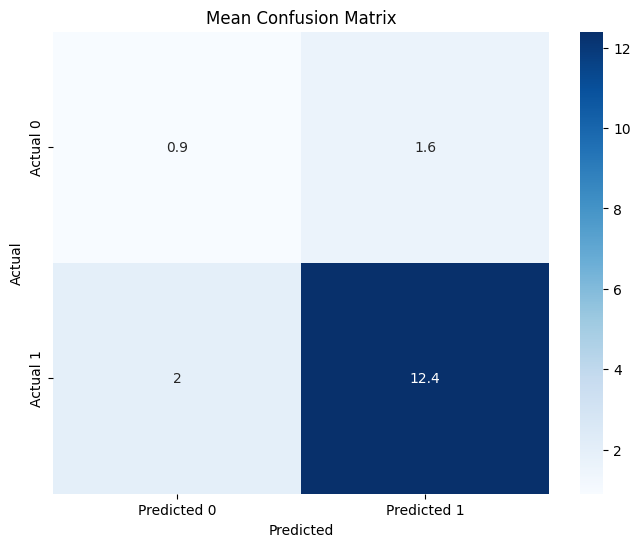

In [20]:
# Inicializando StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar as métricas para cada fold
accuracies = []
conf_matrices = []
classification_reports = []

# Loop para realizar as simulações
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Criando e treinando um modelo de classificação (Decision Tree)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calculando a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

    # Calculando o relatório de classificação
    class_report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(class_report)

# Calculando a média das acurácias
mean_accuracy = np.mean(accuracies)

# Calculando a média das matrizes de confusão
mean_conf_matrix = np.mean(conf_matrices, axis=0)

# Calculando a média ponderada do relatório de classificação
weighted_avg_precision = np.mean([report['weighted avg']['precision'] for report in classification_reports])
weighted_avg_recall = np.mean([report['weighted avg']['recall'] for report in classification_reports])
weighted_avg_f1 = np.mean([report['weighted avg']['f1-score'] for report in classification_reports])

# Imprimindo resultados
print(f'Média das Acurácias: {mean_accuracy}')
print('Média da Matriz de Confusão:')
print(mean_conf_matrix)

# Imprimindo a média ponderada do relatório de classificação
print('Média Ponderada do Relatório de Classificação:')
print(f'Precision: {weighted_avg_precision}')
print(f'Recall: {weighted_avg_recall}')
print(f'F1-Score: {weighted_avg_f1}')

# Plotando a média da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Mean Confusion Matrix')
plt.show()


### Desenho Experimental

#### Teste Comparativo

In [21]:

# Número de simulações
num_simulations = 30

# Lista para armazenar as acurácias de cada simulação
accuracies = []

# Loop para realizar as simulações
for i in range(num_simulations):
    # Dividindo o conjunto de dados em treino e validação usando validação cruzada estratificada
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
    accuracies_fold = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Criando e treinando um modelo de classificação (Decision Tree)
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação
        y_pred_val = model.predict(X_val)

        # Avaliando o modelo na validação
        accuracy_val = accuracy_score(y_val, y_pred_val)
        accuracies_fold.append(accuracy_val)

    # Armazenando a média das acurácias para esta simulação
    accuracies.append(np.mean(accuracies_fold))

# Realizando um teste t pareado para comparar as simulações
mean_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies, ddof=1)
t_statistic, p_value = ttest_rel(accuracies, [mean_accuracy] * num_simulations)

# Imprimindo resultados
print(f'Média das Acurácias: {mean_accuracy}')
print(f'Desvio Padrão das Acurácias: {std_dev_accuracy}')
print(f'T-Estatística: {t_statistic}')
print(f'Valor p: {p_value}')

Média das Acurácias: 0.7760539215686272
Desvio Padrão das Acurácias: 0.012386781941309528
T-Estatística: 1.080028076804873e-13
Valor p: 0.9999999999999145


#### Validação

In [22]:
# Lista para armazenar as acurácias de cada simulação para Decision Tree
accuracies_dt = []

# Lista para armazenar as acurácias de cada simulação para Logistic Regression
accuracies_lr = []

# Loop para realizar as simulações
for i in range(num_simulations):
    # Dividindo o conjunto de dados em treino e validação usando validação cruzada estratificada
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
    accuracies_fold_dt = []
    accuracies_fold_lr = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Criando e treinando um modelo de classificação (Decision Tree)
        model_dt = DecisionTreeClassifier(random_state=42)
        model_dt.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação para Decision Tree
        y_pred_val_dt = model_dt.predict(X_val)

        # Avaliando o modelo na validação para Decision Tree
        accuracy_val_dt = accuracy_score(y_val, y_pred_val_dt)
        accuracies_fold_dt.append(accuracy_val_dt)

        # Criando e treinando um modelo de Regressão Logística
        model_lr = LogisticRegression(random_state=42)
        model_lr.fit(X_train, y_train)

        # Fazendo previsões no conjunto de validação para Logistic Regression
        y_pred_val_lr = model_lr.predict(X_val)

        # Avaliando o modelo na validação para Logistic Regression
        accuracy_val_lr = accuracy_score(y_val, y_pred_val_lr)
        accuracies_fold_lr.append(accuracy_val_lr)

    # Armazenando a média das acurácias para cada modelo
    accuracies_dt.append(np.mean(accuracies_fold_dt))
    accuracies_lr.append(np.mean(accuracies_fold_lr))

# Realizando um teste t pareado para comparar os resultados das simulações para Decision Tree e Logistic Regression
t_statistic, p_value = ttest_rel(accuracies_dt, accuracies_lr)

# Imprimindo resultados
print(f'Média das Acurácias Decision Tree: {np.mean(accuracies_dt)}')
print(f'Média das Acurácias Logistic Regression: {np.mean(accuracies_lr)}')
print(f'T-Estatística: {t_statistic}')
print(f'Valor p: {p_value}')

Média das Acurácias Decision Tree: 0.7760539215686272
Média das Acurácias Logistic Regression: 0.852205882352941
T-Estatística: -33.67310970472113
Valor p: 8.445943796509567e-25


## Regressão Paramétrica

In [23]:
# Criando um DataFrame para armazenar os resultados
analise = pd.DataFrame({'Model': [],
                           'MSE':[],
                           'MAE':[],
                           'R2':[]})

In [24]:
!kaggle datasets download -d thedevastator/jobs-dataset-from-glassdoor --force
!unzip -qo jobs-dataset-from-glassdoor.zip
#!ls
df = pd.read_csv('eda_data.csv')

  0% 0.00/3.23M [00:00<?, ?B/s]
100% 3.23M/3.23M [00:00<00:00, 170MB/s]


In [25]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,...,20,1,0,0,1,1,data scientist,na,3747,3
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,...,12,0,0,0,0,1,data scientist,na,1786,0
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,...,15,1,0,1,1,1,data scientist,na,3804,0
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,...,6,0,0,0,0,0,na,na,1538,0
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,...,11,1,0,1,0,0,data scientist,na,4574,2


In [26]:
df.info

<bound method DataFrame.info of      Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
..          ...                                                ...   
737         737           Sr Scientist, Immuno-Oncology - Oncology   
738         738                               Senior Data Engineer   
739         739  Project Scientist - Auton Lab, Robotics Institute   
740         740                               Data Science Manager   
741         741          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Gl

<Axes: >

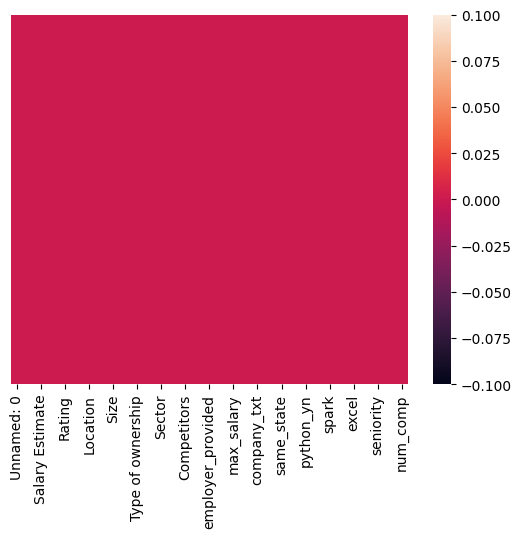

In [27]:
sns.heatmap(df.isnull(), yticklabels=False)

In [28]:
df = df[(df != -1).all(axis=1)]


Text(0.5, 1.0, 'Correlation heatmap')

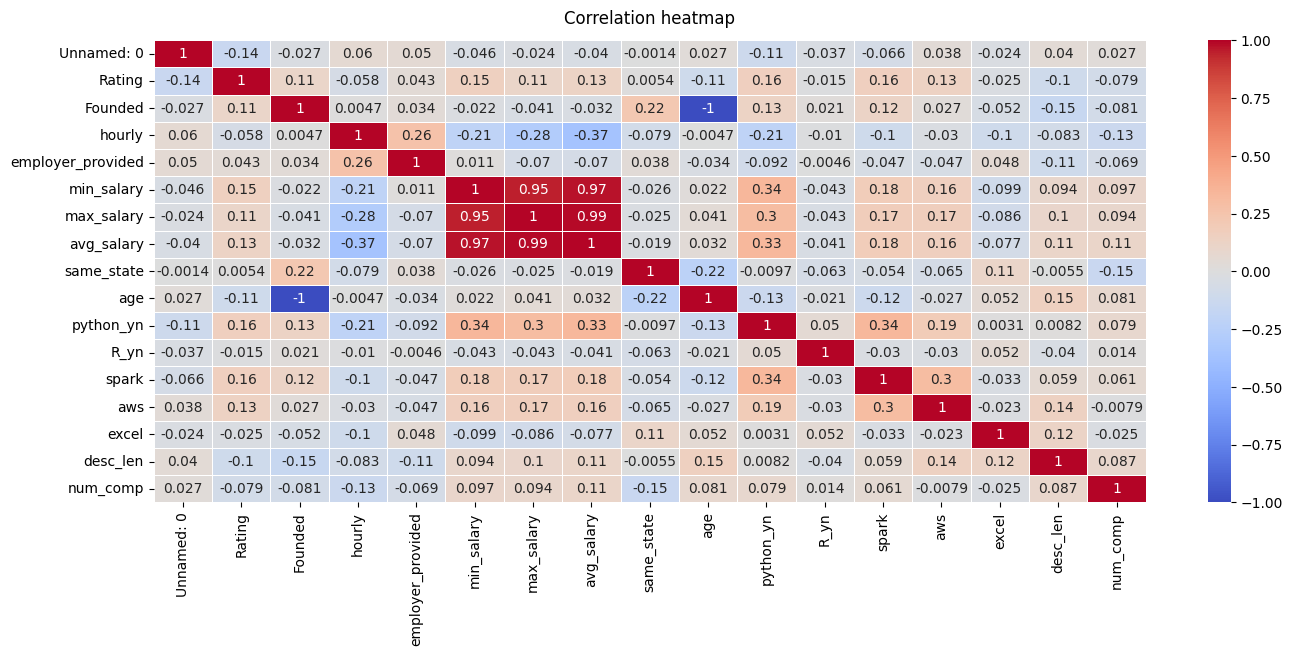

In [29]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(numeric_only = True), cmap='coolwarm', vmin=-1, vmax=1, annot=True, linewidth=.5)
heatmap.set_title('Correlation heatmap', pad=12)

### Regressão Linear

In [30]:
def get_all_metrics(data, predictions):
  mse = mean_squared_error(data, predictions)
  mae = mean_absolute_error(data, predictions)
  r2 = r2_score(data, predictions)
  return [mae, mse, r2]

In [31]:

# Supondo que seu DataFrame seja chamado df
# Selecione as variáveis relevantes
df_subset = df[['avg_salary', 'python_yn', 'spark', 'excel']]

# Pré-processamento: Converta as variáveis categóricas em variáveis dummy
df_subset = pd.get_dummies(df_subset, columns=['python_yn', 'spark', 'excel'], drop_first=True)

# Divida os dados em conjuntos de treinamento e teste
X = df_subset.drop('avg_salary', axis=1)
y = df_subset['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crie e ajuste o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalie o modelo com métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exiba as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.5f}")
print(f"Erro Absoluto Médio (MAE): {mae:.5f}")
print(f"Coeficiente de Determinação (R²): {r2:.5f}")

Erro Quadrático Médio (MSE): 1365.92382
Erro Absoluto Médio (MAE): 29.48435
Coeficiente de Determinação (R²): 0.13358


## Série Temporal

### Dataset

In [35]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset --force
!unzip -qo novel-corona-virus-2019-dataset.zip

 70% 6.00M/8.52M [00:00<00:00, 62.5MB/s]
100% 8.52M/8.52M [00:00<00:00, 76.5MB/s]
 covid_19_data.csv		       time_series_covid_19_confirmed.csv
 eda_data.csv			       time_series_covid_19_confirmed_US.csv
 glassdoor_jobs.csv		       time_series_covid_19_deaths.csv
 jobs-dataset-from-glassdoor.zip       time_series_covid_19_deaths_US.csv
 novel-corona-virus-2019-dataset.zip   time_series_covid_19_recovered.csv
 salary_data_cleaned.csv	      'Wrongful Convictions in the United States.csv'
 sample_data			       wrongful-convictions-in-the-us.zip


In [36]:
df = pd.read_csv('covid_19_data.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [37]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


### EDA

In [38]:
df_br=df[df['Country/Region']=="Brazil"]
df_br["ObservationDate"]=pd.to_datetime(df_br["ObservationDate"])
df_br=df_br.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

<ipython-input-38-c3222286b561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br["ObservationDate"]=pd.to_datetime(df_br["ObservationDate"])


In [41]:
print("Casos Confirmados",df_br["Confirmed"].iloc[-1])
print("Casos Recuperados",df_br["Recovered"].iloc[-1])
print("Casos de Mortes",df_br["Deaths"].iloc[-1])
print("Casos Ativos",df_br["Confirmed"].iloc[-1]-df_br["Recovered"].iloc[-1]-df_br["Deaths"].iloc[-1])
print("Casos Encerrados",df_br["Recovered"].iloc[-1]+df_br["Deaths"].iloc[-1])
print("Casos Confirmados por dia",round(df_br["Confirmed"].iloc[-1]/df_br.shape[0]))
print("Casos Recuperados por dia",round(df_br["Recovered"].iloc[-1]/df_br.shape[0]))
print("Casos de Óbito por dia",round(df_br["Deaths"].iloc[-1]/df_br.shape[0]))

Casos Confirmados 16471600.0
Casos Recuperados 14496224.0
Casos de Óbito 461057.0
Casos Ativos 1514319.0
Casos Encerrados 14957281.0
Casos Confirmados por dia 35808
Casos Recuperados por dia 31514
Casos de Óbito por dia 1002


In [44]:
fig=px.bar(x=df_br.index,y=df_br["Confirmed"]-df_br["Recovered"]-df_br["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

fig=px.bar(x=df_br.index,y=df_br["Recovered"]+df_br["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [103]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_br.index, y=df_br["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df_br.index, y=df_br["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=df_br.index, y=df_br["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Crescimento dos Casos no Brasil",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [54]:
# Calculando as taxas
recovery_rate = (df_br["Recovered"] / df_br["Confirmed"]) * 100
mortality_rate = (df_br["Deaths"] / df_br["Confirmed"]) * 100

# Calculando as estatísticas de taxa
mean_recovery_rate = recovery_rate.mean()
mean_mortality_rate = mortality_rate.mean()
median_recovery_rate = recovery_rate.median()
median_mortality_rate = mortality_rate.median()

print('Média de Recuperação: ', mean_recovery_rate)
print('Mediana da Recuperação: ', median_recovery_rate)
print('Média de Mortalidade: ', mean_mortality_rate)
print('Mediana da Mortalidade: ', median_mortality_rate)

Média de Recuperação:  70.17138621486475
Mediana da Recuperação:  87.59170621207306
Média de Mortalidade:  3.2778178102416313
Mediana da Mortalidade:  2.8414541210346926


In [62]:
import plotly.graph_objects as go

# Criando um gráfico de linha para as taxas de recuperação e mortalidade ao longo do tempo
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_br.index, y=recovery_rate, mode='lines', name='Taxa de Recuperação'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='red'), name='Média de Recuperação',line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='blue'), name='Mediana de Recuperação',line=dict(color='blue', dash='dash')))

fig.add_trace(go.Scatter(x=df_br.index, y=mortality_rate, mode='lines', name='Taxa de Mortalidade'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='green'), name='Média de Mortalidade',line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='orange'), name='Mediana de Mortalidade',line=dict(color='orange', dash='dash')))

# Adicionando linhas para a média e mediana
fig.add_shape(
    type='line',
    x0=df_br.index[0],
    x1=df_br.index[-1],
    y0=mean_recovery_rate,
    y1=mean_recovery_rate,
    line=dict(color='red', dash='dash'),
    name='Média de Recuperação'
)

fig.add_shape(
    type='line',
    x0=df_br.index[0],
    x1=df_br.index[-1],
    y0=median_recovery_rate,
    y1=median_recovery_rate,
    line=dict(color='blue', dash='dash'),
    name='Mediana de Recuperação'
)

fig.add_shape(
    type='line',
    x0=df_br.index[0],
    x1=df_br.index[-1],
    y0=mean_mortality_rate,
    y1=mean_mortality_rate,
    line=dict(color='green', dash='dash'),
    name='Média de Mortalidade'
)

fig.add_shape(
    type='line',
    x0=df_br.index[0],
    x1=df_br.index[-1],
    y0=median_mortality_rate,
    y1=median_mortality_rate,
    line=dict(color='orange', dash='dash'),
    name='Mediana de Mortalidade'
)

# Configurando o layout do gráfico
fig.update_layout(title='Taxas de Recuperação e Mortalidade ao Longo do Tempo',
                  xaxis_title='Data',
                  yaxis_title='Taxa (%)')

# Exibindo o gráfico
fig.show()


### ARIMA

In [97]:
model_train=df_br.iloc[:int(df_br.shape[0]*0.95)]
valid=df_br.iloc[int(df_br.shape[0]*0.95):]
y_pred=valid.copy()

# Ajustando um modelo ARIMA com auto_arima
model = auto_arima(df_br['Confirmed'], start_p=1, start_q=1,
                   test='adf',       # use adftest para encontrar ordem de diferenciação ideal
                   max_p=3, max_q=3, # máximos lags de AR e MA
                   m=1,              # frequência da série temporal (deixe em 1 se não for sazonal)
                   d=None,           # deixe d como None para auto-determinar
                   seasonal=False,   # ajuste para True se houver sazonalidade
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

order = model.get_params()['order']

print(model.summary())
print(f"\nBest ARIMA Order: {order}")


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7520.393, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12545.233, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.83 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7301.929, Time=1.90 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=12135.680, Time=0.67 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=10.000, Time=1.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.65 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.85 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7270.986, Time=1.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.56 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=3.32 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6986.225, Time=4.94 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 21.49

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3015: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1363: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning:

invalid value encountered in divide



p-valor: 0.9943147055258275
A série não é estacionária.


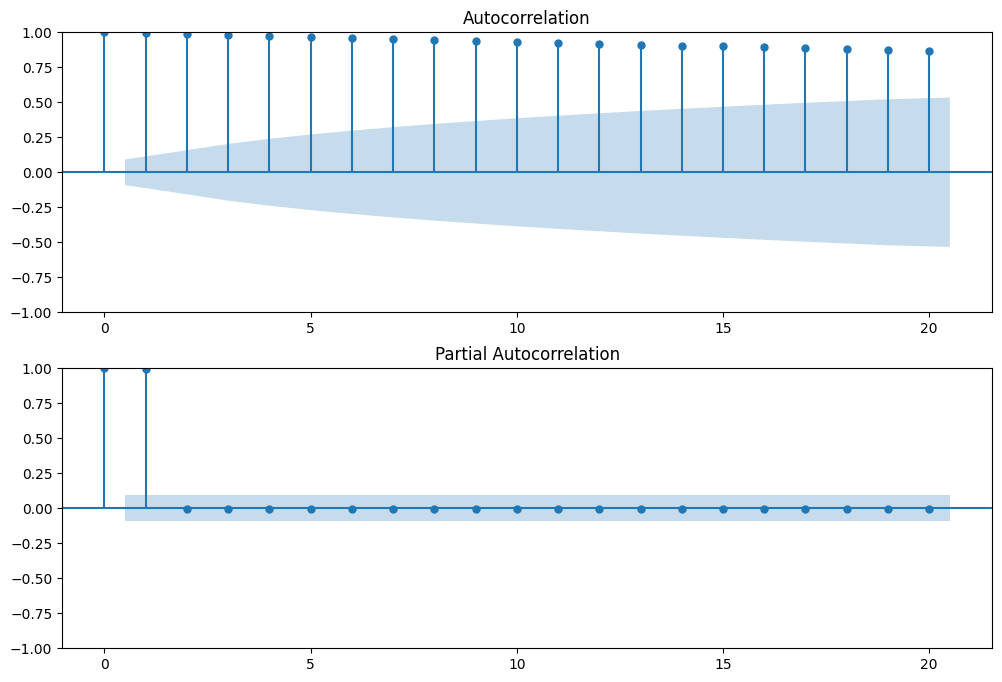

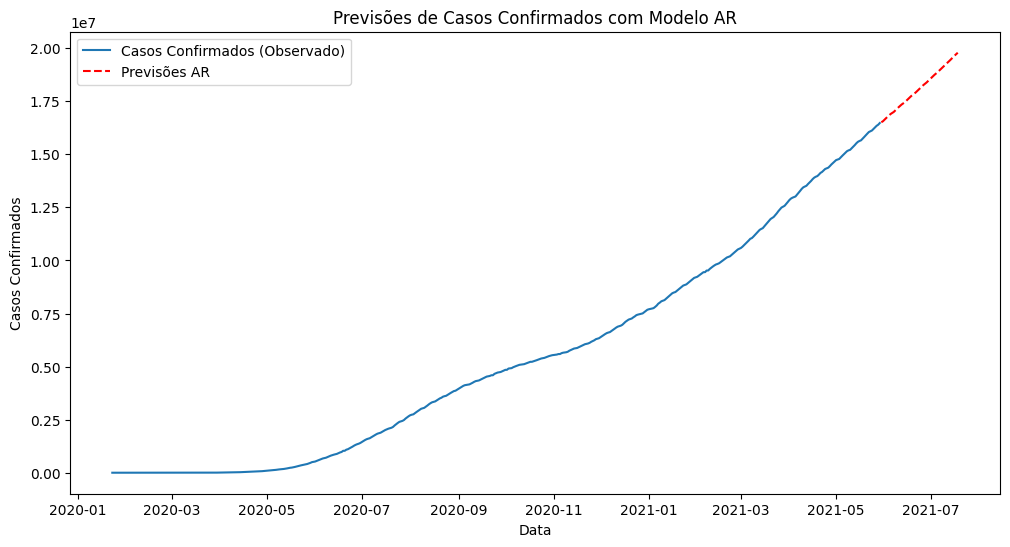

In [124]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

# Testando a estacionariedade
adf_test = adfuller(df_br['Confirmed'])
print(f'p-valor: {adf_test[1]}')
if adf_test[1] < 0.05:
    print('A série é estacionária.')
else:
    print('A série não é estacionária.')

# Análise de ACF e PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_br['Confirmed'], lags=20, ax=ax1)
plot_pacf(df_br['Confirmed'], lags=20, ax=ax2)
plt.show()

# Escolhendo um valor para lags (neste exemplo, estou escolhendo 10)
lags = 10

# Ajustando um modelo AR
model = AutoReg(df_br['Confirmed'], lags=lags)
model_fit = model.fit()

# Fazendo previsões
forecast_steps = 50
predictions = model_fit.predict(start=len(df_br['Confirmed']), end=len(df_br['Confirmed']) + forecast_steps - 1)

# Criando um índice de datas para as previsões
forecast_index = pd.date_range(start=df_br.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Criando um DataFrame com as previsões
forecast_df = pd.DataFrame({'Date': forecast_index, 'Predictions': predictions})

# Adicionando as previsões ao seu conjunto de dados original
df_br_forecast = df_br.copy()
df_br_forecast = df_br_forecast.append(forecast_df.set_index('Date'))

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_br['Confirmed'], label='Casos Confirmados (Observado)')
plt.plot(df_br_forecast['Predictions'], label='Previsões AR', linestyle='dashed', color='red')
plt.title('Previsões de Casos Confirmados com Modelo AR')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=10117.326, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=10269.244, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=10240.847, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=10135.978, Time=0.40 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=10107.977, Time=1.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=10229.196, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=10081.831, Time=0.99 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=10207.376, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=10001.063, Time=1.25 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=10186.206, Time=0.79 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=9907.934, Time=2.92 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=9920.030, Time=4.82 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=9927.078, Time=4.59 sec

Best model:  ARIMA(3,2,3)(0,0,0)[0]          
Total fit time: 17.797 seconds
           

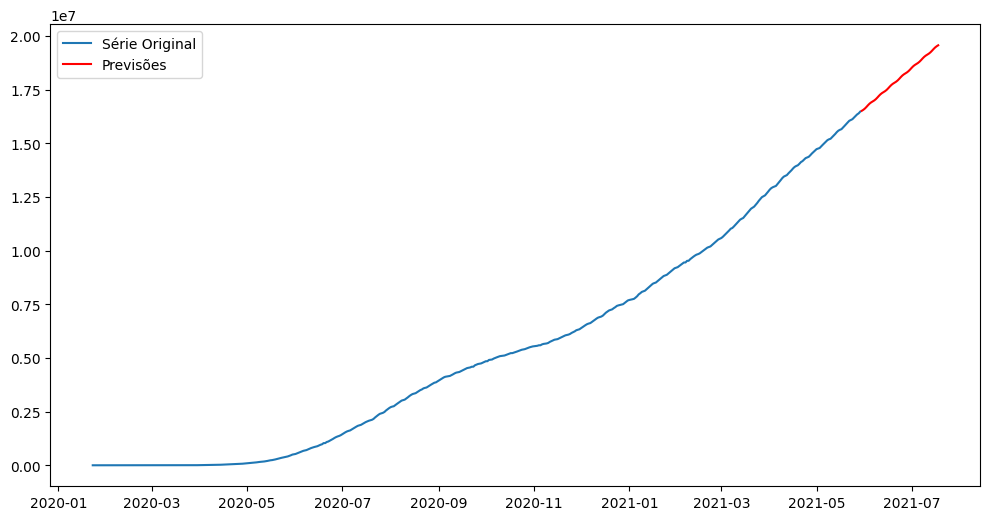

In [129]:
# Ajustando um modelo ARIMA com auto_arima
model = auto_arima(df_br['Confirmed'], start_p=1, start_q=1,
                   test='adf',       # use adftest para encontrar ordem de diferenciação ideal
                   max_p=3, max_q=3, # máximos lags de AR e MA
                   m=1,              # frequência da série temporal (deixe em 1 se não for sazonal)
                   d=None,           # deixe d como None para auto-determinar
                   seasonal=False,   # ajuste para True se houver sazonalidade
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())

# Fazendo previsões
forecast_steps = 50
predictions = model.predict(n_periods=forecast_steps)

# Criando um novo índice de datas para a previsão
forecast_index = pd.date_range(df_br.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_br['Confirmed'], label='Série Original')
plt.plot(forecast_index, predictions, label='Previsões', color='red')
plt.legend()
plt.show()
